In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearnex import patch_sklearn 
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# 1. Load data

In [3]:
origin_data = pd.read_csv("data/covid_death_dataset.csv")

In [4]:
origin_data.describe(include='all')

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
unique,NaN,NaN,NaN,NaN,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,9999-99-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,971633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,NaN,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,NaN,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01


In [5]:
origin_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


# 2. Data processing

The dataset was provided by the Mexican government (https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

classification_final: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.  
sex: 1 for female and 2 for male.  
age: of the patient.  
patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.  
pneumonia: whether the patient already have air sacs inflammation or not.  
pregnancy: whether the patient is pregnant or not.  
diabetes: whether the patient has diabetes or not.  
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.  
asthma: whether the patient has asthma or not.  
inmsupr: whether the patient is immunosuppressed or not.  
hypertension: whether the patient has hypertension or not.  
cardiovascular: whether the patient has heart or blood vessels related disease.   
renal chronic: whether the patient has chronic renal disease or not.  
other disease: whether the patient has other disease or not.  
obesity: whether the patient is obese or not.  
tobacco: whether the patient is a tobacco user.  
usmr: Indicates whether the patient treated medical units of the first, second or third level.  
medical unit: type of institution of the National Health System that provided the care.  
intubed: whether the patient was connected to the ventilator.  
icu: Indicates whether the patient had been admitted to an Intensive Care Unit.  
date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.  

In [6]:
def code_converter(coded_value):
    if coded_value == 1:
        value = "Yes"
    elif coded_value == 2:
        value = "No"
    else:
        value = "Unknown"
    return value

In [7]:
origin_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [8]:
data = origin_data.copy()
data['SEX'] = origin_data['SEX'].apply(lambda x: "female" if x==1 else "male")
data['PATIENT_TYPE'] = origin_data['PATIENT_TYPE'].apply(lambda x: "Return_home" if x==1 else "Hospitalization")
data['INTUBED'] = origin_data['INTUBED'].apply(code_converter)

data['PNEUMONIA'] = origin_data['PNEUMONIA'].apply(code_converter)
data['PREGNANT'] = origin_data['PREGNANT'].apply(code_converter)
data['DIABETES'] = origin_data['DIABETES'].apply(code_converter)
data['COPD'] = origin_data['COPD'].apply(code_converter)
data['ASTHMA'] = origin_data['ASTHMA'].apply(code_converter)

data['INMSUPR'] = origin_data['INMSUPR'].apply(code_converter)
data['HIPERTENSION'] = origin_data['HIPERTENSION'].apply(code_converter)
data['OTHER_DISEASE'] = origin_data['OTHER_DISEASE'].apply(code_converter)
data['CARDIOVASCULAR'] = origin_data['CARDIOVASCULAR'].apply(code_converter)

data['OBESITY'] = origin_data['OBESITY'].apply(code_converter)
data['RENAL_CHRONIC'] = origin_data['RENAL_CHRONIC'].apply(code_converter)
data['TOBACCO'] = origin_data['TOBACCO'].apply(code_converter)
data['CLASIFFICATION_FINAL'] = origin_data['CLASIFFICATION_FINAL'].apply(code_converter)
data['ICU'] = origin_data['ICU'].apply(code_converter)

# 3. Feature engineering

## 3.1 Features

In [9]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,female,Return_home,03/05/2020,Unknown,Yes,65,No,No,No,No,No,Yes,No,No,No,No,No,Unknown,Unknown
1,2,1,male,Return_home,03/06/2020,Unknown,Yes,72,Unknown,No,No,No,No,Yes,No,No,Yes,Yes,No,Unknown,Unknown
2,2,1,male,Hospitalization,09/06/2020,Yes,No,55,Unknown,Yes,No,No,No,No,No,No,No,No,No,Unknown,No
3,2,1,female,Return_home,12/06/2020,Unknown,No,53,No,No,No,No,No,No,No,No,No,No,No,Unknown,Unknown
4,2,1,male,Return_home,21/06/2020,Unknown,No,68,Unknown,Yes,No,No,No,Yes,No,No,No,No,No,Unknown,Unknown


In [10]:
def one_hot_encode_column(df, column_name):
    one_hot = pd.get_dummies(df[column_name], prefix=column_name)
    df = df.drop(column_name,axis = 1)
    df = df.join(one_hot)
    return df

In [11]:
feature_df = data.copy()
feature_df = one_hot_encode_column(feature_df, 'USMER')
feature_df = one_hot_encode_column(feature_df, 'MEDICAL_UNIT')
feature_df = one_hot_encode_column(feature_df, 'SEX')
feature_df = one_hot_encode_column(feature_df, 'PATIENT_TYPE')
feature_df = one_hot_encode_column(feature_df, 'INTUBED')

feature_df = one_hot_encode_column(feature_df, 'PNEUMONIA')
feature_df = one_hot_encode_column(feature_df, 'PREGNANT')
feature_df = one_hot_encode_column(feature_df, 'DIABETES')
feature_df = one_hot_encode_column(feature_df, 'COPD')
feature_df = one_hot_encode_column(feature_df, 'ASTHMA')

feature_df = one_hot_encode_column(feature_df, 'INMSUPR')
feature_df = one_hot_encode_column(feature_df, 'HIPERTENSION')
feature_df = one_hot_encode_column(feature_df, 'OTHER_DISEASE')
feature_df = one_hot_encode_column(feature_df, 'CARDIOVASCULAR')

feature_df = one_hot_encode_column(feature_df, 'OBESITY')
feature_df = one_hot_encode_column(feature_df, 'RENAL_CHRONIC')
feature_df = one_hot_encode_column(feature_df, 'TOBACCO')
feature_df = one_hot_encode_column(feature_df, 'CLASIFFICATION_FINAL')
feature_df = one_hot_encode_column(feature_df, 'ICU')

## 3.2 Generate death data as y

In [12]:
print(f"# of death: {data[data['DATE_DIED'] != '9999-99-99'].shape[0]}, from total {data.shape[0]}. Death rate= {data[data['DATE_DIED'] != '9999-99-99'].shape[0]/data.shape[0]*100}%")
feature_df['DEATH'] = feature_df['DATE_DIED'].apply(lambda x: False if x=='9999-99-99' else True)

# of death: 76942, from total 1048575. Death rate= 7.337767923133777%


## 3.3 Feature selection

In [13]:
feature_df.head()

,DATE_DIED,AGE,USMER_1,USMER_2,MEDICAL_UNIT_1,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,SEX_female,SEX_male,PATIENT_TYPE_Hospitalization,PATIENT_TYPE_Return_home,INTUBED_No,INTUBED_Unknown,INTUBED_Yes,PNEUMONIA_No,PNEUMONIA_Unknown,PNEUMONIA_Yes,PREGNANT_No,PREGNANT_Unknown,PREGNANT_Yes,DIABETES_No,DIABETES_Unknown,DIABETES_Yes,COPD_No,COPD_Unknown,COPD_Yes,ASTHMA_No,ASTHMA_Unknown,ASTHMA_Yes,INMSUPR_No,INMSUPR_Unknown,INMSUPR_Yes,HIPERTENSION_No,HIPERTENSION_Unknown,HIPERTENSION_Yes,OTHER_DISEASE_No,OTHER_DISEASE_Unknown,OTHER_DISEASE_Yes,CARDIOVASCULAR_No,CARDIOVASCULAR_Unknown,CARDIOVASCULAR_Yes,OBESITY_No,OBESITY_Unknown,OBESITY_Yes,RENAL_CHRONIC_No,RENAL_CHRONIC_Unknown,RENAL_CHRONIC_Yes,TOBACCO_No,TOBACCO_Unknown,TOBACCO_Yes,CLASIFFICATION_FINAL_No,CLASIFFICATION_FINAL_Unknown,CLASIFFICATION_FINAL_Yes,ICU_No,ICU_Unknown,ICU_Yes,DEATH
0,03/05/2020,65,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,True
1,03/06/2020,72,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,True
2,09/06/2020,55,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,True
3,12/06/2020,53,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,True
4,21/06/2020,68,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,True


In [14]:
feature_df.columns

Index(['DATE_DIED', 'AGE', 'USMER_1', 'USMER_2', 'MEDICAL_UNIT_1',
       'MEDICAL_UNIT_2', 'MEDICAL_UNIT_3', 'MEDICAL_UNIT_4', 'MEDICAL_UNIT_5',
       'MEDICAL_UNIT_6', 'MEDICAL_UNIT_7', 'MEDICAL_UNIT_8', 'MEDICAL_UNIT_9',
       'MEDICAL_UNIT_10', 'MEDICAL_UNIT_11', 'MEDICAL_UNIT_12',
       'MEDICAL_UNIT_13', 'SEX_female', 'SEX_male',
       'PATIENT_TYPE_Hospitalization', 'PATIENT_TYPE_Return_home',
       'INTUBED_No', 'INTUBED_Unknown', 'INTUBED_Yes', 'PNEUMONIA_No',
       'PNEUMONIA_Unknown', 'PNEUMONIA_Yes', 'PREGNANT_No', 'PREGNANT_Unknown',
       'PREGNANT_Yes', 'DIABETES_No', 'DIABETES_Unknown', 'DIABETES_Yes',
       'COPD_No', 'COPD_Unknown', 'COPD_Yes', 'ASTHMA_No', 'ASTHMA_Unknown',
       'ASTHMA_Yes', 'INMSUPR_No', 'INMSUPR_Unknown', 'INMSUPR_Yes',
       'HIPERTENSION_No', 'HIPERTENSION_Unknown', 'HIPERTENSION_Yes',
       'OTHER_DISEASE_No', 'OTHER_DISEASE_Unknown', 'OTHER_DISEASE_Yes',
       'CARDIOVASCULAR_No', 'CARDIOVASCULAR_Unknown', 'CARDIOVASCULAR_Yes',
  

In [15]:
selected_df = feature_df[['DEATH', 'AGE', 'USMER_1', 'USMER_2', 'MEDICAL_UNIT_1',
       'MEDICAL_UNIT_2', 'MEDICAL_UNIT_3', 'MEDICAL_UNIT_4', 'MEDICAL_UNIT_5',
       'MEDICAL_UNIT_6', 'MEDICAL_UNIT_7', 'MEDICAL_UNIT_8', 'MEDICAL_UNIT_9',
       'MEDICAL_UNIT_10', 'MEDICAL_UNIT_11', 'MEDICAL_UNIT_12',
       'MEDICAL_UNIT_13', 'SEX_female', 'SEX_male',
       'PATIENT_TYPE_Hospitalization', 'PATIENT_TYPE_Return_home',
       'INTUBED_No', 'INTUBED_Unknown', 'INTUBED_Yes', 'PNEUMONIA_No',
       'PNEUMONIA_Unknown', 'PNEUMONIA_Yes', 'PREGNANT_No', 'PREGNANT_Unknown',
       'PREGNANT_Yes', 'DIABETES_No', 'DIABETES_Unknown', 'DIABETES_Yes',
       'COPD_No', 'COPD_Unknown', 'COPD_Yes', 'ASTHMA_No', 'ASTHMA_Unknown',
       'ASTHMA_Yes', 'INMSUPR_No', 'INMSUPR_Unknown', 'INMSUPR_Yes',
       'HIPERTENSION_No', 'HIPERTENSION_Unknown', 'HIPERTENSION_Yes',
       'OTHER_DISEASE_No', 'OTHER_DISEASE_Unknown', 'OTHER_DISEASE_Yes',
       'CARDIOVASCULAR_No', 'CARDIOVASCULAR_Unknown', 'CARDIOVASCULAR_Yes',
       'OBESITY_No', 'OBESITY_Unknown', 'OBESITY_Yes', 'RENAL_CHRONIC_No',
       'RENAL_CHRONIC_Unknown', 'RENAL_CHRONIC_Yes', 'TOBACCO_No',
       'TOBACCO_Unknown', 'TOBACCO_Yes', 'CLASIFFICATION_FINAL_No',
       'CLASIFFICATION_FINAL_Unknown', 'CLASIFFICATION_FINAL_Yes', 'ICU_No',
       'ICU_Unknown', 'ICU_Yes']]

## 3.4 Train test data split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = selected_df.drop("DEATH", axis=1)
y = selected_df[["DEATH"]]

In [18]:
test_rate = 0.20
random_state = 100
cv_folds = 5

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_rate, random_state=random_state)

In [20]:
print(f"Train data Death rate: {100*y_train[y_train['DEATH']].shape[0]/y_train.shape[0]}%, # of death: {y_train[y_train['DEATH']].shape[0]}")
print(f"Test data Death rate: {100*y_test[y_test['DEATH']].shape[0]/y_test.shape[0]}%, # of death: {y_test[y_test['DEATH']].shape[0]}")

Train data Death rate: 7.336027465846506%, # of death: 61539
Test data Death rate: 7.34472975228286%, # of death: 15403


# 4. Build model

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score

## 4.1 Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# decision_tree_model= DecisionTreeClassifier(random_state=random_state)
# param_grid = {'criterion':['gini','entropy', 'log_loss'],
#               'max_depth': np.arange(4, 10)},
              

# #use gridsearch to test all values
# dt_model_GridSearch = GridSearchCV(decision_tree_model, param_grid, cv=cross_validation)
# #fit model to data
# dt_model_GridSearch.fit(X_train, y_train)

### Find best max depth 

In [24]:
max_depth_range = np.arange(3,20)

In [25]:
decision_tree_model = DecisionTreeClassifier(random_state=random_state)
train_scores, cv_scores = validation_curve(decision_tree_model, 
                                           X_train, y_train, 
                                           param_range=max_depth_range, 
                                           param_name='max_depth', cv=cv_folds,
                                           n_jobs=-1
                                          )

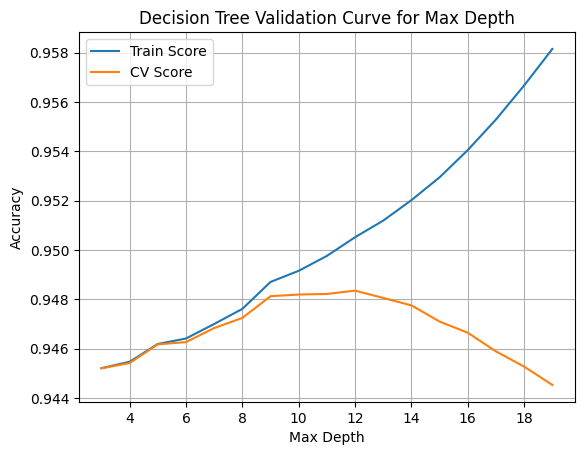

In [26]:
plt.figure()
plt.plot(max_depth_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(max_depth_range, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Decision Tree Validation Curve for Max Depth")
plt.grid()
plt.savefig('covid_death_decision_tree_max_depth_plot.png')
plt.show()

### Find best criterion

In [27]:
criterion_list = ['gini','entropy', 'log_loss']

In [28]:
decision_tree_model = DecisionTreeClassifier(random_state=random_state, max_depth=12)
train_scores, cv_scores = validation_curve(decision_tree_model, 
                                           X_train, y_train, 
                                           param_range=criterion_list, 
                                           param_name='criterion', 
                                           cv=cv_folds,
                                           n_jobs=-1
                                          )

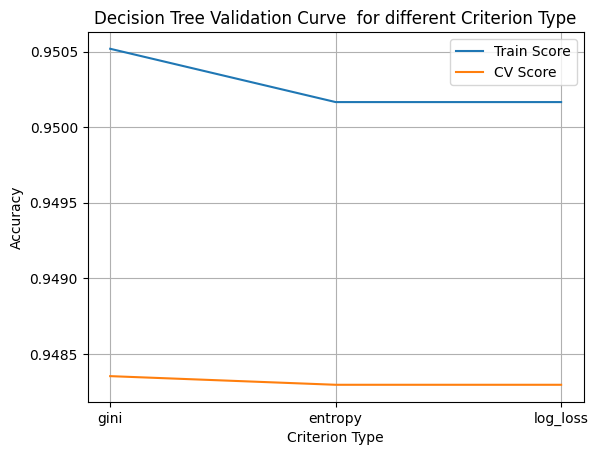

In [29]:
plt.figure()
plt.plot(criterion_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(criterion_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Criterion Type")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Decision Tree Validation Curve  for different Criterion Type")
plt.grid()

plt.savefig('covid_death_decision_tree_criterion_plot.png')
plt.show()

### Find best ccp_alpha for Minimal Cost-Complexity Pruning

In [30]:
ccp_alpha_range = np.linspace(0,0.035, 14+1)

In [31]:
decision_tree_model = DecisionTreeClassifier(random_state=random_state, max_depth=12, criterion='gini')
train_scores, cv_scores = validation_curve(decision_tree_model, 
                                           X_train, y_train, 
                                           param_range=ccp_alpha_range, 
                                           param_name='ccp_alpha', 
                                           cv=cv_folds,
                                           n_jobs=-1
                                          )

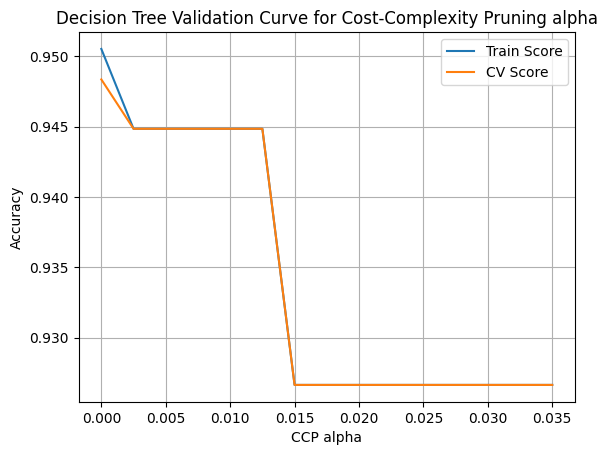

In [32]:
plt.figure()
plt.plot(ccp_alpha_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(ccp_alpha_range, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("CCP alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Decision Tree Validation Curve for Cost-Complexity Pruning alpha")
plt.grid()

plt.savefig('decision_tree_ccp_alpha_plot.png')
plt.show()

### Model with best parameters

In [33]:
decision_tree_model = DecisionTreeClassifier(random_state=random_state, 
                                             max_depth=12, criterion='gini', ccp_alpha=0.0)

decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=100)

In [34]:
y_pred = decision_tree_model.predict(X_test)

print(f"Best Decision Tree accuracy on Test dataset: {100*accuracy_score(y_test, y_pred)}")

Best Decision Tree accuracy on Test dataset: 94.82821924993443


[0.53824116 0.2160575  0.12193739 0.02902568 0.01852111 0.0132432
 0.00886725 0.00434951 0.00412871 0.00372943]


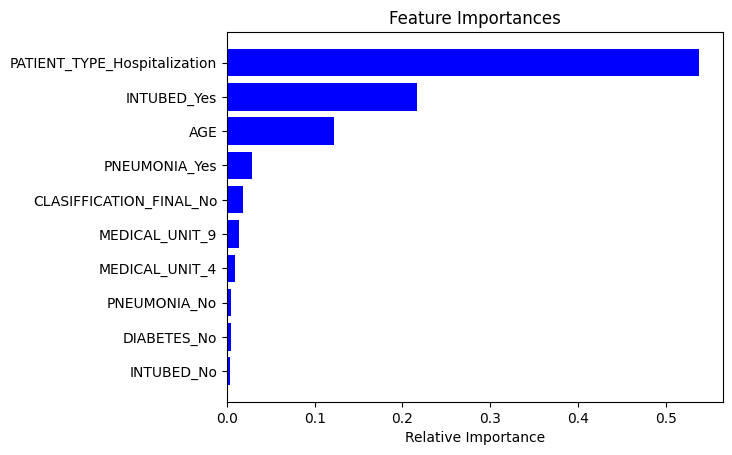

In [35]:
top_k = 10

importances = decision_tree_model.feature_importances_
indices = np.argsort(importances)[::-1][:top_k]
print(importances[indices])
features = X_train.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices][::-1], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices[::-1]])
plt.xlabel('Relative Importance')

plt.savefig('credit_score_decision_tree_feature_importance_plot.png')
plt.show()

In [36]:
# importances = decision_tree_model.feature_importances_
# indices = np.argsort(importances)
# features = X_train.columns

# plt.figure(figsize=(20, 10))
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

## 4.2 Neural Network

In [37]:
from sklearn.neural_network import MLPClassifier

### Find best neural numbers 

In [38]:
hidden_layer_sizes_list = [(val, val) for val in range(5, 50, 5)] 

In [39]:
neural_network_model = MLPClassifier(random_state=random_state, early_stopping=True)
train_scores, cv_scores = validation_curve(neural_network_model, 
                                           X_train, y_train, 
                                           param_name="hidden_layer_sizes", 
                                           param_range=hidden_layer_sizes_list, 
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

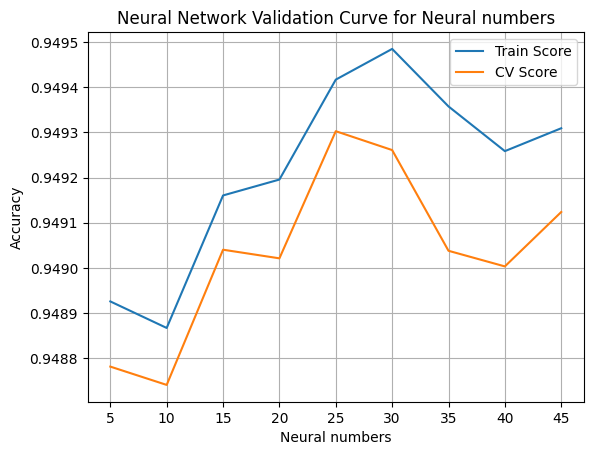

In [40]:
plt.figure()
plt.plot([val[0] for val in hidden_layer_sizes_list], np.mean(train_scores, axis=1), label='Train Score')
plt.plot([val[0] for val in hidden_layer_sizes_list], np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Neural numbers")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Neural Network Validation Curve for Neural numbers")
plt.grid()

plt.savefig('covid_death_neural_network_neural_numbers_plot.png')

plt.show()

### Find best activation function

In [41]:
activation_list = ['identity', 'logistic', 'tanh', 'relu'] 

In [42]:
neural_network_model = MLPClassifier(random_state=random_state, early_stopping=True, 
                                     hidden_layer_sizes=(25, 25))
train_scores, cv_scores = validation_curve(neural_network_model, 
                                           X_train, y_train, 
                                           param_name="activation", 
                                           param_range=activation_list, 
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

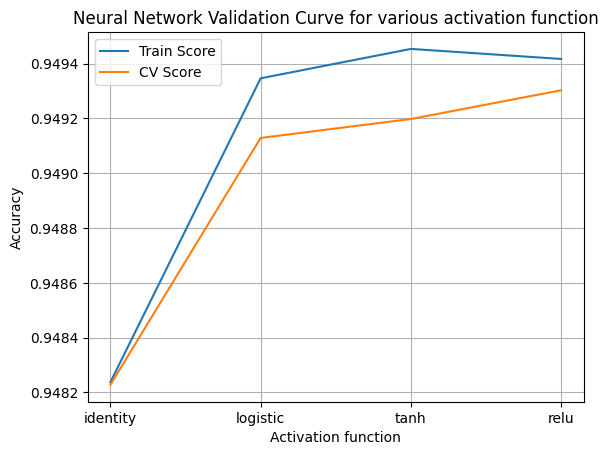

In [43]:
plt.figure()
plt.plot(activation_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(activation_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Activation function")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Neural Network Validation Curve for various activation function")
plt.grid()

plt.savefig('covid_death_neural_network_activation_function_plot.png')
plt.show()

### Find best solver

In [44]:
solver_list = ['lbfgs', 'sgd', 'adam'] 

In [45]:
neural_network_model = MLPClassifier(random_state=random_state, early_stopping=True,
                                     hidden_layer_sizes=(25, 25),
                                     activation='relu',
                                    )
train_scores, cv_scores = validation_curve(neural_network_model, 
                                           X_train, y_train, 
                                           param_name="solver", 
                                           param_range=solver_list, 
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

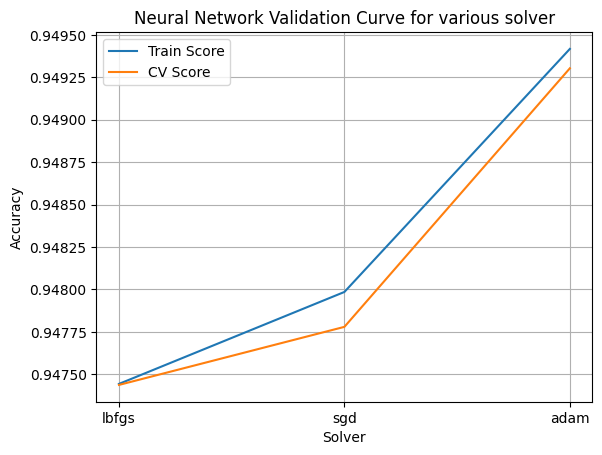

In [46]:
plt.figure()
plt.plot(solver_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(solver_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Solver")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Neural Network Validation Curve for various solver")
plt.grid()

plt.savefig('covid_death_neural_network_solver_plot.png')
plt.show()

### Model with best parameters

In [47]:
neural_network_model = MLPClassifier(random_state=random_state, early_stopping=True,
                                     hidden_layer_sizes=(25, 25),
                                     activation='relu',
                                     solver='adam',
                                    )

neural_network_model.fit(X_train, y_train)

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/skle

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(25, 25),
              random_state=100)

In [48]:
y_pred = neural_network_model.predict(X_test)

print(f"Best Neural Network accuracy on Test dataset: {100*accuracy_score(y_test, y_pred)}")

Best Neural Network accuracy on Test dataset: 94.8625515580669


## 4.3 Boosting

In [49]:
from sklearn.ensemble import AdaBoostClassifier

### Find best number of estimators

In [50]:
n_estimators_list = range(5, 30, 5)

In [51]:
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12,
                                                                          criterion='gini', 
                                                                          random_state=42))
train_scores, cv_scores = validation_curve(adaboost_model,
                                           X_train, y_train,
                                           param_name="n_estimators",
                                           param_range=n_estimators_list,
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/skle

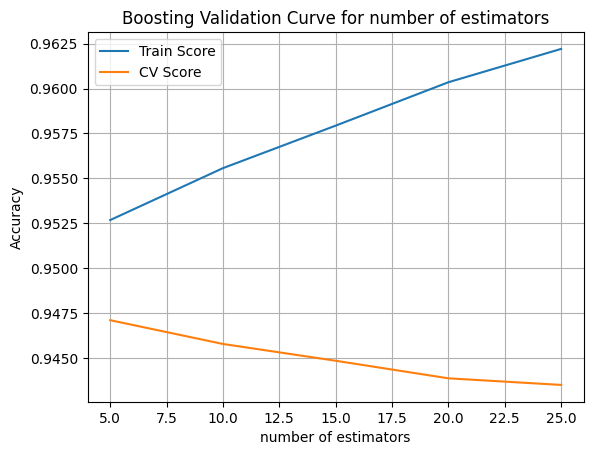

In [52]:
plt.figure()
plt.plot(n_estimators_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(n_estimators_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("number of estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Boosting Validation Curve for number of estimators")
plt.grid()

plt.savefig('covid_death_boosting_no_estimators_plot.png')
plt.show()

### Find best learning rate

In [53]:
learning_rate_list = np.logspace(-4,2,7)

In [54]:
learning_rate_list

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [55]:
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12, 
                                                                          random_state=42),
                                    n_estimators=5
                                   )
train_scores, cv_scores = validation_curve(adaboost_model,
                                           X_train, y_train,
                                           param_name="learning_rate",
                                           param_range=learning_rate_list,
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

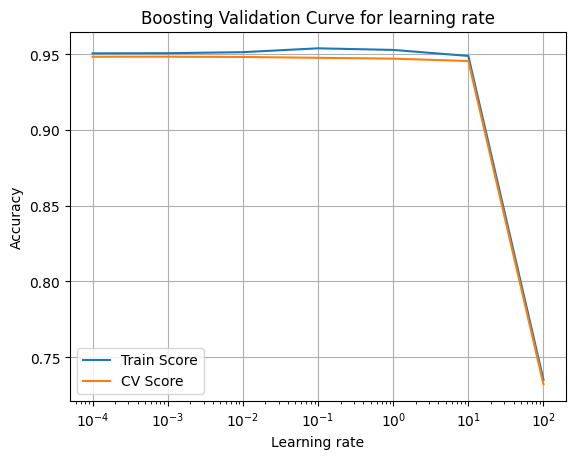

In [56]:
plt.figure()
plt.semilogx(learning_rate_list, np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(learning_rate_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Boosting Validation Curve for learning rate")
plt.grid()

plt.savefig('covid_death_boosting_learning_rate_plot.png')
plt.show()

In [57]:
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12, 
                                                                          random_state=42),
                                    n_estimators=5,
                                    learning_rate=0.001
                                   )
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12,
                                                         random_state=42),
                   learning_rate=0.001, n_estimators=5)

In [81]:
y_pred = adaboost_model.predict(X_test)
print(f"Best Boost model accuracy on Test dataset: {100*accuracy_score(y_test, y_pred)}")

Best Boost model accuracy on Test dataset: 94.8334644636769


## 4.4 SVM

In [59]:
from sklearn import svm

Due to 1 million records runs way too slow on SVM, have to use sampling to reduce training time for parameter selection

In [60]:
sample_df = selected_df.sample(frac=0.001, replace=False, random_state=random_state)
sample_X = selected_df.drop("DEATH", axis=1)
sample_y = selected_df[["DEATH"]]
sample_X_train, sample_X_test, sample_y_train, sample_y_test = train_test_split(sample_X, 
                                                                                sample_y, 
                                                                                test_size=test_rate, 
                                                                                random_state=random_state)

### Find best C

In [61]:
C_list = np.logspace(-3,2,6)

In [62]:
svm_model = svm.SVC(random_state=random_state)
train_scores, cv_scores = validation_curve(svm_model,
                                           sample_X_train, sample_y_train.values.ravel(),
                                           param_name="C",
                                           param_range=C_list,
                                           cv=cv_folds,
                                           n_jobs=8,
                                          )

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d ar

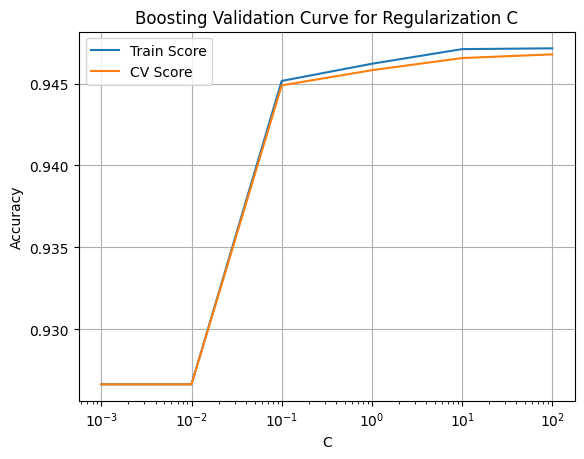

In [64]:
plt.figure()
plt.semilogx(C_list, np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(C_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Boosting Validation Curve for Regularization C")
plt.grid()

plt.savefig('covid_death_covid_death_SVM_C_plot.png')
plt.show()

### Find best kernel

In [65]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

In [66]:
svm_model = svm.SVC(random_state=random_state, C=100)
train_scores, cv_scores = validation_curve(svm_model,
                                           sample_X_train, sample_y_train.values.ravel(),
                                           param_name="kernel",
                                           param_range=kernel_list,
                                           cv=cv_folds,
                                           n_jobs=8,
                                          )

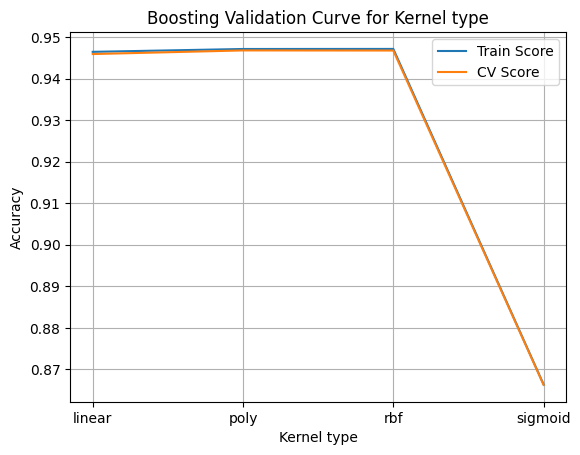

In [67]:
plt.figure()
plt.plot(kernel_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(kernel_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Kernel type")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Boosting Validation Curve for Kernel type")
plt.grid()

plt.savefig('covid_death_covid_death_SVM_kernel_plot.png')
plt.show()

### Best model accuracy

In [68]:
import time 
start_time = time.time()
svm_model = svm.SVC(random_state=random_state, C=100, kernel='rbf')
svm_model.fit(sample_X_train, sample_y_train)
print(f"run time: {time.time()-start_time}")

run time: 635.7140707969666


In [82]:
sample_y_pred = svm_model.predict(X_test)
print(f"Best SVM model accuracy on Test dataset: {100*accuracy_score(sample_y_test, sample_y_pred)}%")

Best SVM model accuracy on Test dataset: 94.69518155592112%


## 4.5 KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

Due to 1 million records runs way too slow on KNN, have to use sampling to reduce training time for parameter selection

In [71]:
sample_df = selected_df.sample(frac=0.001, replace=False, random_state=random_state)
sample_X = selected_df.drop("DEATH", axis=1)
sample_y = selected_df[["DEATH"]]
sample_X_train, sample_X_test, sample_y_train, sample_y_test = train_test_split(sample_X, 
                                                                                sample_y, 
                                                                                test_size=test_rate, 
                                                                                random_state=random_state)

### Find best number of neighbors

In [72]:
n_neighbors_list = range(5, 30, 5)

In [73]:
knn_model = KNeighborsClassifier()
train_scores, cv_scores = validation_curve(knn_model,
                                           sample_X_train, sample_y_train.values.ravel(),
                                           param_name="n_neighbors",
                                           param_range=n_neighbors_list,
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

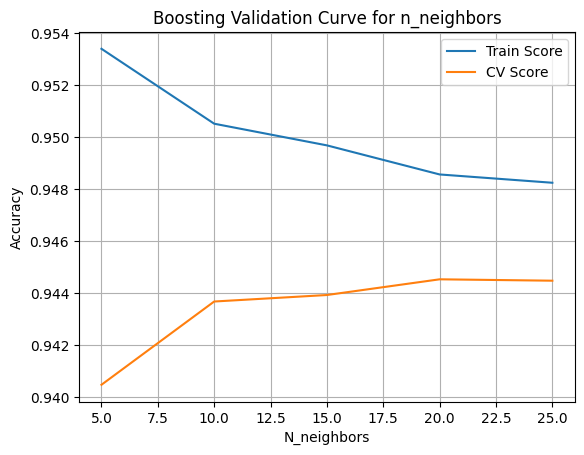

In [74]:
plt.figure()
plt.plot(n_neighbors_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(n_neighbors_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("N_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Boosting Validation Curve for n_neighbors")
plt.grid()

plt.savefig('covid_death_knn_N_neighbors_plot.png')
plt.show()

### Find best algorithm

In [75]:
algorithm_list = ['ball_tree', 'kd_tree', 'brute']

In [77]:
knn_model = KNeighborsClassifier(n_neighbors=20)
train_scores, cv_scores = validation_curve(knn_model,
                                           sample_X_train, sample_y_train.values.ravel(),
                                           param_name="algorithm",
                                           param_range=algorithm_list,
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

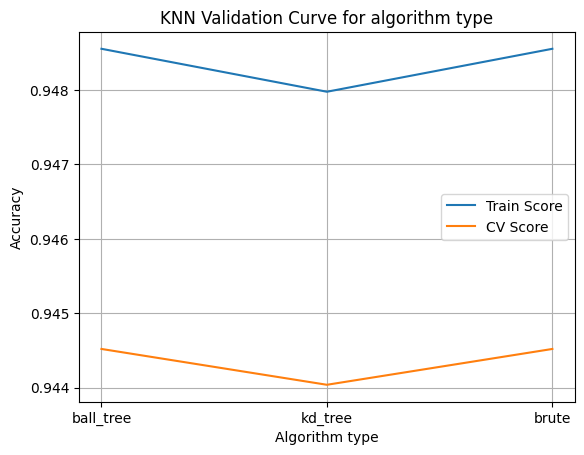

In [78]:
plt.figure()
plt.plot(algorithm_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(algorithm_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Algorithm type")
plt.ylabel("Accuracy")
plt.legend()
plt.title("KNN Validation Curve for algorithm type")
plt.grid()

plt.savefig('covid_death_knn_algorithm_plot.png')
plt.show()

### Best model accuracy

In [79]:
import time 
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=20, algorithm='ball_tree')
knn_model.fit(X_train, y_train)
print(f"run time: {time.time()-start_time}")

run time: 0.797433614730835


In [80]:
start_time = time.time()
y_pred = knn_model.predict(X_test)
print(f"Best KNN model accuracy on Test dataset: {100*accuracy_score(y_test, y_pred)}")
print(f"run time: {time.time()-start_time}")

Best KNN model accuracy on Test dataset: 94.46248480080108
run time: 20.679665565490723


# 5. Performance comparison